# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B 23Winter/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters=3
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

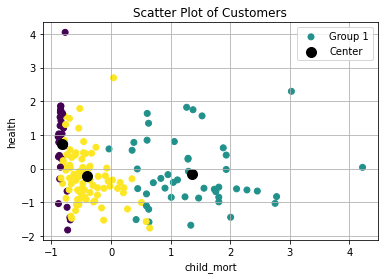

In [11]:
x1_index = 0
x2_index = 2


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs = []
Ks = range(1,20)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

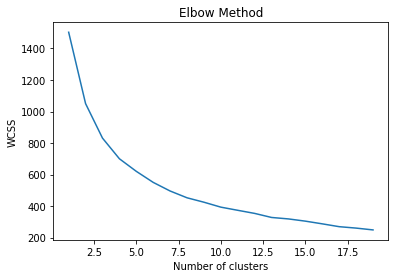

In [13]:
plt.plot(range(1, 20), WCSSs)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As you can see, WCSS decreases less when the number of clusters is greater than 4. So the elbow happens when number of clusters is equal to 4.

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [14]:
kmeans_chosen = KMeans(n_clusters=4).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [15]:
cluster_assignments = kmeans_chosen.predict(X_scaled)

clusters = {str(i): [] for i in range(kmeans_chosen.n_clusters)}
for i, label in enumerate(cluster_assignments):
    country = df.iloc[i]['country']
    clusters[str(label)].append(country)

# Print the countries in each cluster
for i in range(kmeans_chosen.n_clusters):
    print('Cluster', i+1, ':', clusters[str(i)])

Cluster 1 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Ton

From the list of countries, we can see that cluster 1 and cluster 3 are mainly developing countries with relatively low GDP per capita and economics growth. And cluster 2 are mainly developed countries with higher GDP per capita and economic growth. It is hard to analyze cluster 4 since there are only three countries in it.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [16]:
centroids = kmeans_chosen.cluster_centers_
colnames = X.columns
desc_stats = pd.DataFrame(centroids, columns=colnames)

# Set the row index to be the cluster numbers
desc_stats.index = ['Cluster {}'.format(i+1) for i in range(kmeans_chosen.n_clusters)]

# Print the table
print(desc_stats)

           child_mort   exports    health   imports    income  inflation  \
Cluster 1   -0.419827  0.006648 -0.211724  0.047581 -0.217274  -0.034953   
Cluster 2    1.360218 -0.437533 -0.155984 -0.189204 -0.686894   0.402111   
Cluster 3   -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189   
Cluster 4   -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   

           life_expec  total_fer      gdpp  
Cluster 1    0.268420  -0.438222 -0.330805  
Cluster 2   -1.282180   1.364944 -0.604242  
Cluster 3    1.107649  -0.763681  1.661902  
Cluster 4    1.226824  -1.038863  2.440797  


# 7.) Write an observation about the descriptive statistics.

Cluster 1 has the lowest health of -0.211, it has moderate export and import indicators.
Cluster 2 has a very low children moetality and it has the highest health indicator and a very high income indicator. In addition, the life expectancy for cluster 2 is also very high.
Cluster 3 has the highest children mortality, lowest export indicator, GDP and income. However, only cluster 3 has positive inflation rate.
Cluster 4 hasthe lowest chilren mortality, highest import and export indicators. It also has the highest income, GDP and life expectancy.